In [1]:
import numpy as np
import cv2
import cv_helper as ch
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def show_filters(img,filters,img_with_filters,title):
    fig,ax=plt.subplots(1,3)
    ax[0].imshow(dog,cmap='gray')
    ax[0].set_title('original')
    ax[1].imshow(filters,cmap='gray')
    ax[1].set_title('filter')
    ax[2].imshow(img_with_filters,cmap='gray')
    ax[2].set_title(title)

In [23]:
img_path=ch.get_img_path('dog')
dog=cv2.imread(img_path,0)
dog_dft=np.fft.fft2(dog)
dog_dftshift=np.fft.fftshift(dog_dft)

In [24]:
#low-pass
low_pass=np.zeros_like(dog)
sz=10
low_pass[dog.shape[0]//2-sz:dog.shape[0]//2+sz,dog.shape[1]//2-sz:dog.shape[1]//2+sz]=1
dog_idft=np.fft.ifft2(np.fft.ifftshift(dog_dftshift*low_pass))
dog_mag=np.abs(dog_idft)
dog_lowpass=cv2.normalize(dog_mag,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

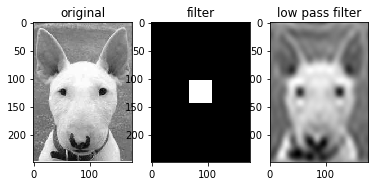

In [46]:
show_filters(dog,low_pass,dog_lowpass,'low pass filter')

In [47]:
#high-pass
high_pass=np.ones_like(dog)
sz=20
high_pass[dog.shape[0]//2-sz:dog.shape[0]//2+sz,dog.shape[1]//2-sz:dog.shape[1]//2+sz]=0
dog_idft=np.fft.ifft2(np.fft.ifftshift(dog_dftshift*high_pass))
dog_mag=np.abs(dog_idft)
dog_highpass=cv2.normalize(dog_mag,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

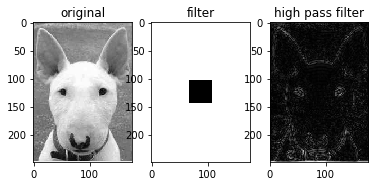

In [48]:
show_filters(dog,high_pass,dog_highpass,'high pass filter')

In [49]:
##band-pass
low_pass=np.zeros_like(dog)
sz=20
low_pass[dog.shape[0]//2-sz:dog.shape[0]//2+sz,dog.shape[1]//2-sz:dog.shape[1]//2+sz]=1
high_pass=np.ones_like(dog)
sz=10
high_pass[dog.shape[0]//2-sz:dog.shape[0]//2+sz,dog.shape[1]//2-sz:dog.shape[1]//2+sz]=0
band_pass=low_pass*high_pass
dog_idft=np.fft.ifft2(np.fft.ifftshift(dog_dftshift*band_pass))
dog_mag=np.abs(dog_idft)
dog_bandpass=cv2.normalize(dog_mag,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

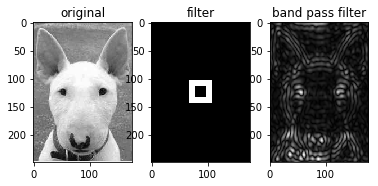

In [50]:
show_filters(dog,band_pass,dog_bandpass,'band pass filter')